In [33]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [201]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [203]:
x_train.shape

(60000, 28, 28)

In [14]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
X_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
X_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

In [15]:
X_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
early_stopping_monitor = EarlyStopping(patience=3)

## 4 layer model

In [19]:
# Create the model: model
model_1 = Sequential()

# Add the first hidden layer
model_1.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model_1.add(Dense(50, activation='relu'))

# Add the third hidden layer
model_1.add(Dense(50, activation='relu'))

# Add the fourth hidden layer
model_1.add(Dense(50, activation='relu'))

# Add the output layer
model_1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])

# Final evaluation of the model
scores = model_1.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 12s 290us/step - loss: 2.2388 - acc: 0.7792 - val_loss: 0.4383 - val_acc: 0.8950
Epoch 2/20
42000/42000 [==============================] - 11s 258us/step - loss: 0.3200 - acc: 0.9148 - val_loss: 0.2757 - val_acc: 0.9271
Epoch 3/20
42000/42000 [==============================] - 11s 260us/step - loss: 0.2271 - acc: 0.9373 - val_loss: 0.2376 - val_acc: 0.9359
Epoch 4/20
42000/42000 [==============================] - 11s 260us/step - loss: 0.1920 - acc: 0.9469 - val_loss: 0.2144 - val_acc: 0.9404
Epoch 5/20
42000/42000 [==============================] - 11s 262us/step - loss: 0.1586 - acc: 0.9538 - val_loss: 0.2319 - val_acc: 0.9411
Epoch 6/20
42000/42000 [==============================] - 12s 284us/step - loss: 0.1410 - acc: 0.9599 - val_loss: 0.1803 - val_acc: 0.9508
Epoch 7/20
42000/42000 [==============================] - 13s 299us/step - loss: 0.1273 - acc: 0.9633 - val_loss: 0.

## CNN model

In [204]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
early_stopping_monitor = EarlyStopping(patience=3)

In [11]:
model_2 = Sequential()

model_2.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(15, (3, 3), activation='relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Dropout(0.2))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(50, activation='relu'))

# Output layer
model_2.add(Dense(num_classes, activation='softmax'))


# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_2.fit(X_train, y_train, epochs=20, batch_size=200, validation_split=0.3, callbacks = [early_stopping_monitor])

# Final evaluation of the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 113us/step - loss: 0.4990 - acc: 0.8421 - val_loss: 0.1176 - val_acc: 0.9653
Epoch 2/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.1229 - acc: 0.9628 - val_loss: 0.0834 - val_acc: 0.9747
Epoch 3/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.0851 - acc: 0.9737 - val_loss: 0.0726 - val_acc: 0.9774
Epoch 4/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.0678 - acc: 0.9784 - val_loss: 0.0606 - val_acc: 0.9816
Epoch 5/20
42000/42000 [==============================] - 2s 50us/step - loss: 0.0606 - acc: 0.9813 - val_loss: 0.0628 - val_acc: 0.9819
Epoch 6/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.0526 - acc: 0.9832 - val_loss: 0.0491 - val_acc: 0.9850
Epoch 7/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.0466 - acc: 0.9852 - val_loss: 0.0535 - val_ac

<p>This saves the architecture of the model, weights, training config (loss,optimizer), state of optimizer, allowing to resume training where we last left off</p>

In [21]:
model_2.save('mnist_cnn_model.h5')

In [22]:
from keras.models import load_model
mnist_model = load_model('mnist_cnn_model.h5')

In [23]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               48128     
__________

# productionizing


In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

mnist_model = load_model('mnist_cnn_model.h5')

def predict_user_img(img_path, model):
    # takes user image as input, preprocesses it,
    # and returns the prediction
    
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    
    if(model == 'model_1'):
        x = img.reshape(1,784).astype('float32')
        probs = model_1.predict(x)
        prediction = np.argmax(probs)
        return prediction, plt.imshow(img)
    
    elif(model == 'mnist_model'):
        x = img.reshape(1, 28, 28,1).astype('float32')
        probs = mnist_model.predict(x)
        prediction = np.argmax(probs)        
        return prediction, plt.imshow(img)

(3, <matplotlib.image.AxesImage at 0x2a5173a5c50>)

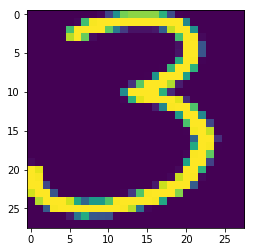

In [11]:
predict_user_img('digit3.png', 'mnist_model')

In [335]:
import cv2
import numpy as np 

drawing=False # true if mouse is pressed
mode=True # if True, draw rectangle. Press 'm' to toggle to curve

# mouse callback function
def interactive_drawing(event,x,y,flags,param):
    global ix,iy,drawing, mode

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix,iy=x,y

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            if mode==True:
                cv2.line(img,(ix,iy),(x,y),(0,0,255),10)
                ix=x
                iy=y

#                 print (x,y)
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        if mode==True:
            cv2.line(img,(ix,iy),(x,y),(0,0,255),10)
            ix=x
            iy=y
            #print x,y
            #cv2.line(img,(x,y),(x,y),(0,0,255),10)
    return x,y




img = np.zeros((512,512,3), np.uint8)

cv2.namedWindow('image')
cv2.setMouseCallback('image',interactive_drawing)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
cv2.destroyAllWindows()

In [13]:
import os

In [ ]:
!python predict.py